Exactitud con 2 arboles:  0.86
Exactitud con 3 arboles:  0.91
Exactitud con 4 arboles:  0.88
Exactitud con 5 arboles:  0.91
Exactitud con 6 arboles:  0.89


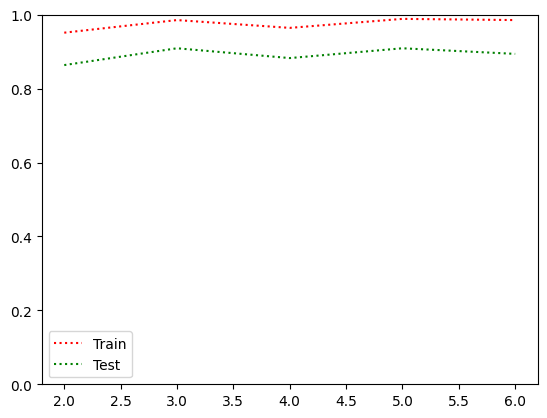

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset from CSV
data = pd.read_csv('./files/Vinos.csv')

# Assuming the target variable is in the last column
X = data.iloc[:, :-1]#Save my data
y = data.iloc[:, -1]#Save my clases

# Split the dataset into training and testing sets
valoresTrain, valoresTest, clasesTrain, clasesTest = train_test_split(X, y, test_size=0.30)

trees = [2,3,4,5,6]
Test = []
Train = []

for tree in trees:
    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=tree)#random_state=42 to generate a specific seed 

    # Train the classifier on the training data
    rf_classifier.fit(valoresTrain, clasesTrain)

    # Make predictions on the testing data
    predic = rf_classifier.predict(valoresTest)
    predicTrain = rf_classifier.predict(valoresTrain)

    # Calculate accuracy
    Test.append(accuracy_score(clasesTest, predic))
    
    Train.append(accuracy_score(clasesTrain, predicTrain))
    
    print(f"Exactitud con {tree} arboles: ",round(accuracy_score(clasesTest, predic),2))


plt.plot(trees, Train, label = "Train", color = "red", linestyle = "dotted")
plt.plot(trees, Test, label = "Test", color = "green", linestyle = "dotted")
plt.ylim(0,1)
plt.legend()